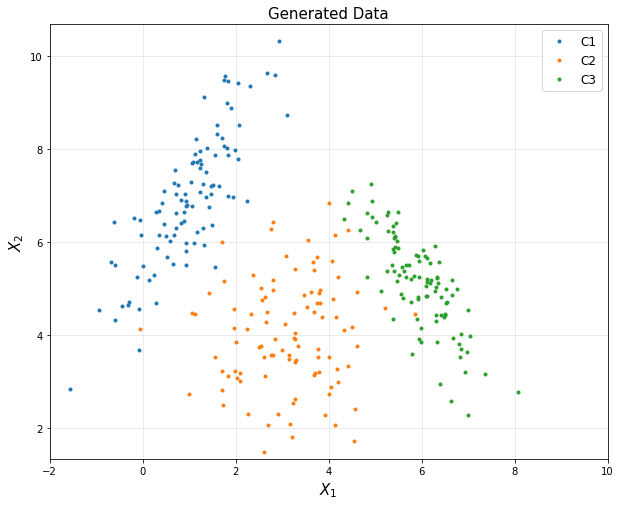

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [5]:
from sklearn import linear_model
clf_12 = linear_model.LogisticRegression(solver = 'lbfgs')
clf_13 = linear_model.LogisticRegression(solver = 'lbfgs')
clf_23 = linear_model.LogisticRegression(solver = 'lbfgs')

clf_12.fit(np.vstack([X1, X2]), np.ravel(np.vstack([y1, y2])))
clf_13.fit(np.vstack([X1, X3]), np.ravel(np.vstack([y1, y3])))
clf_23.fit(np.vstack([X2, X3]), np.ravel(np.vstack([y2, y3])))

LogisticRegression()

In [6]:
w_12 = np.zeros([3,1])
w_12[0,0] = clf_12.intercept_[0]
w_12[1,0] = clf_12.coef_[0,0]
w_12[2,0] = clf_12.coef_[0,1]

w_13 = np.zeros([3,1])
w_13[0,0] = clf_13.intercept_[0]
w_13[1,0] = clf_13.coef_[0,0]
w_13[2,0] = clf_13.coef_[0,1]

w_23 = np.zeros([3,1])
w_23[0,0] = clf_23.intercept_[0]
w_23[1,0] = clf_23.coef_[0,0]
w_23[2,0] = clf_23.coef_[0,1]

x1p = np.linspace(-2,10,100).reshape(-1,1)
x2p_12 = - w_12[1,0]/w_12[2,0]*x1p - w_12[0,0]/w_12[2,0]
x2p_13 = - w_13[1,0]/w_13[2,0]*x1p - w_13[0,0]/w_13[2,0]
x2p_23 = - w_23[1,0]/w_23[2,0]*x1p - w_23[0,0]/w_23[2,0]

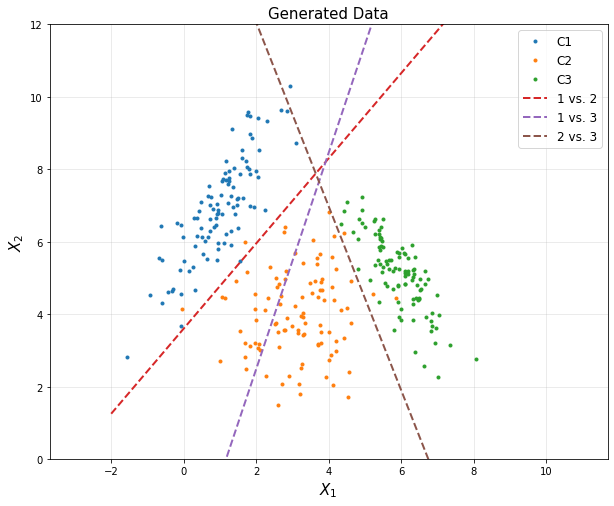

In [7]:
plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(x1p, x2p_12, '--', linewidth = 2, label = '1 vs. 2')
plt.plot(x1p, x2p_13, '--', linewidth = 2, label = '1 vs. 3')
plt.plot(x1p, x2p_23, '--', linewidth = 2, label = '2 vs. 3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [8]:
test_x = [[-2, 8]]

isClass01 = clf_12.predict(test_x)[0] == 1 and clf_13.predict(test_x)[0] == 1
isClass02 = clf_12.predict(test_x)[0] == 2 and clf_23.predict(test_x)[0] == 2
isClass03 = clf_13.predict(test_x)[0] == 3 and clf_23.predict(test_x)[0] == 3

print(isClass01)

True


In [9]:
def class_check(test_x):
    isClass01 = clf_12.predict(test_x)[0] == 1 and clf_13.predict(test_x)[0] == 1
    isClass02 = clf_12.predict(test_x)[0] == 2 and clf_23.predict(test_x)[0] == 2
    isClass03 = clf_13.predict(test_x)[0] == 3 and clf_23.predict(test_x)[0] == 3
    
    if isClass01 == True:
        return 1
    elif isClass02 == True:
        return 2
    elif isClass03 == True:
        return 3
    else:
        return 0   

In [10]:
test_x = [[-2, 8]]
class_check(test_x)

1

In [11]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

In [12]:
Xp.shape

(1600, 2)

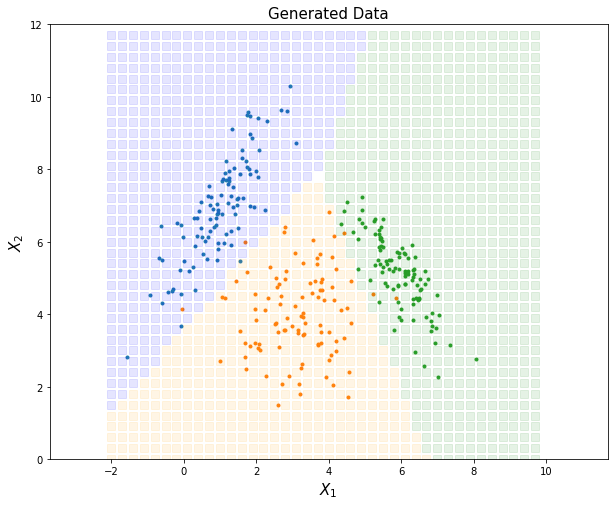

In [13]:
plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.axis('equal')
plt.axis([-2, 10, 0, 12])

for test_x in Xp:
    g = class_check(test_x)
    
    if g == 1:
        c = 'blue'        
    elif g == 2:
        c = 'orange'        
    elif g == 3:
        c = 'green'        
    else:
        c = 'white'
    
    plt.plot(test_x[0,0], test_x[0,1], 's', alpha = 0.1, color = c, markersize = 8)

plt.show()    